#Customer Segmentation

##Importing dataset & libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv',sep='\t')

In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.dropna(inplace=True)
data.shape

(2216, 29)

##Data Cleaning

In [7]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')

In [10]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  2012-09-04       58       635  ...                   10                  4   
1  2014-03-08       38        11  ...                    1                  2   
2  2013-08-21       26       426  ...                    2                 10   
3  2014-02-10       26        11  ...                    0                  4   
4  2014-01-19       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [12]:
data.drop(['ID'],axis=1,inplace=True)

In [13]:
data['Age']=2024-data['Year_Birth']

In [14]:
data[data['Age']>=100].shape

(3, 27)

In [15]:
data['Income'].max()

666666.0

In [16]:
data.drop(data[data['Age']>=100].index,inplace=True)
data.drop(data[data['Income']>=600000].index, inplace=True)
data.drop(['Year_Birth'],axis=1,inplace=True)

In [17]:
data.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  2012-09-04       58   
1  Graduation         Single  46344.0        1         1  2014-03-08       38   
2  Graduation       Together  71613.0        0         0  2013-08-21       26   
3  Graduation       Together  26646.0        1         0  2014-02-10       26   
4         PhD        Married  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  
0             0         0         1   67  
1             0         0         0   70  
2             0         0         0   59  
3             0         0         0   40  
4             0         0         0   43  

[5 rows x 26 columns]

In [18]:
data.shape

(2212, 26)

In [19]:
data['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
data['Marital_Status'].replace('Together','Married',inplace=True)
data['Marital_Status'].replace('Absurd','Single',inplace=True)
data['Marital_Status'].replace('YOLO','Single',inplace=True)
data['Marital_Status'].replace('Widow','Single',inplace=True)
data['Marital_Status'].replace('Alone','Single',inplace=True)

In [21]:
data['Marital_Status'].replace('Divorced','Single',inplace=True)
data['Marital_Status'].value_counts()

Married    1428
Single      784
Name: Marital_Status, dtype: int64

In [22]:
data['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [23]:
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  Postgraduate         Single  58138.0        0         0  2012-09-04   
1  Postgraduate         Single  46344.0        1         1  2014-03-08   
2  Postgraduate        Married  71613.0        0         0  2013-08-21   
3  Postgraduate        Married  26646.0        1         0  2014-02-10   
4  Postgraduate        Married  58293.0        1         0  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0       58       635         88              546  ...                  7   
1       38        11          1                6  ...                  5   
2       26       426         49              127  ...                  4   
3       26        11          4               20  ...                  6   
4       94       173         43              118  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Age  Spent  
0         0         1   67   1617  
1         0         0   70     27  
2         0         0   59    776  
3         0         0   40     53  
4         0         0   43    422  

[5 rows x 27 columns]

In [24]:
data.rename(columns={'MntWines':'Wine','MntFruits':'Fruit','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold'},inplace=True)

In [25]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish', 'Sweet',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Spent'],
      dtype='object')

In [26]:
data['NumPurchases']= data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumDealsPurchases']
data.drop(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],axis=1,inplace=True)
data.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  Postgraduate         Single  58138.0        0         0  2012-09-04   
1  Postgraduate         Single  46344.0        1         1  2014-03-08   
2  Postgraduate        Married  71613.0        0         0  2013-08-21   
3  Postgraduate        Married  26646.0        1         0  2014-02-10   
4  Postgraduate        Married  58293.0        1         0  2014-01-19   

   Recency  Wine  Fruit  Meat  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0       58   635     88   546  ...             0             0             0   
1       38    11      1     6  ...             0             0             0   
2       26   426     49   127  ...             0             0             0   
3       26    11      4    20  ...             0             0             0   
4       94   173     43   118  ...             0             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  NumPurchases  
0             0             0         0         1   67   1617            25  
1             0             0         0         0   70     27             6  
2             0             0         0         0   59    776            21  
3             0             0         0         0   40     53             8  
4             0             0         0         0   43    422            19  

[5 rows x 24 columns]

In [27]:
data.nunique()

Education               2
Marital_Status          2
Income               1970
Kidhome                 3
Teenhome                3
Dt_Customer           662
Recency               100
Wine                  775
Fruit                 158
Meat                  553
Fish                  182
Sweet                 176
Gold                  212
NumWebVisitsMonth      16
AcceptedCmp3            2
AcceptedCmp4            2
AcceptedCmp5            2
AcceptedCmp1            2
AcceptedCmp2            2
Complain                2
Response                2
Age                    56
Spent                1047
NumPurchases           39
dtype: int64

In [28]:
!pip install dataprep

In [29]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
graph = plot(data)


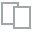
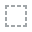
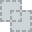
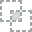
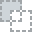
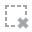
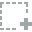
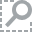
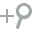
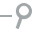
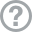
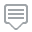
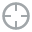
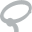
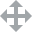
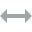
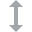
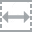
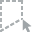
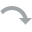
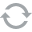
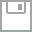
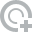
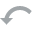
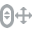
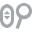
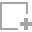
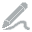
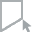
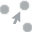
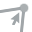
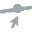

In [30]:
graph

In [31]:
data.drop('Complain',axis=1,inplace=True)

In [32]:
data['isParent']=np.where(data['Kidhome']+data['Teenhome']>0,1,0)
data.head(15)

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0    Postgraduate         Single  58138.0        0         0  2012-09-04   
1    Postgraduate         Single  46344.0        1         1  2014-03-08   
2    Postgraduate        Married  71613.0        0         0  2013-08-21   
3    Postgraduate        Married  26646.0        1         0  2014-02-10   
4    Postgraduate        Married  58293.0        1         0  2014-01-19   
5    Postgraduate        Married  62513.0        0         1  2013-09-09   
6    Postgraduate         Single  55635.0        0         1  2012-11-13   
7    Postgraduate        Married  33454.0        1         0  2013-05-08   
8    Postgraduate        Married  30351.0        1         0  2013-06-06   
9    Postgraduate        Married   5648.0        1         1  2014-03-13   
11  Undergraduate        Married   7500.0        0         0  2012-11-13   
12   Postgraduate         Single  63033.0        0         0  2013-11-15   
13   Postgraduate         Single  59354.0        1         1  2013-11-15   
14   Postgraduate        Married  17323.0        0         0  2012-10-10   
15   Postgraduate         Single  82800.0        0         0  2012-11-24   

    Recency  Wine  Fruit  Meat  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0        58   635     88   546  ...             0             0             0   
1        38    11      1     6  ...             0             0             0   
2        26   426     49   127  ...             0             0             0   
3        26    11      4    20  ...             0             0             0   
4        94   173     43   118  ...             0             0             0   
5        16   520     42    98  ...             0             0             0   
6        34   235     65   164  ...             0             0             0   
7        32    76     10    56  ...             0             0             0   
8        19    14      0    24  ...             0             0             0   
9        68    28      0     6  ...             1             0             0   
11       59     6     16    11  ...             0             0             0   
12       82   194     61   480  ...             0             0             0   
13       53   233      2    53  ...             0             0             0   
14       38     3     14    17  ...             0             0             0   
15       23  1006     22   115  ...             0             0             1   

    AcceptedCmp1  AcceptedCmp2  Response  Age  Spent  NumPurchases  isParent  
0              0             0         1   67   1617            25         0  
1              0             0         0   70     27             6         1  
2              0             0         0   59    776            21         0  
3              0             0         0   40     53             8         1  
4              0             0         0   43    422            19         1  
5              0             0         0   57    716            22         1  
6              0             0         0   53    590            21         1  
7              0             0         0   39    169            10         1  
8              0             0         1   50     46             6         1  
9              0             0         0   74     49             2         1  
11             0             0         0   48     61             6         0  
12             0             0         0   65   1102            16         0  
13             0             0         0   72    310            15         1  
14             0             0         0   37     46             5         0  
15             1             0         1   78   1315            26         0  

[15 rows x 24 columns]

In [33]:
data['Customer_for']=data['Dt_Customer'].max()-data['Dt_Customer']
data['Customer_for']=data['Customer_for'].dt.days
data.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  Postgraduate         Single  58138.0        0         0  2012-09-04   
1  Postgraduate         Single  46344.0        1         1  2014-03-08   
2  Postgraduate        Married  71613.0        0         0  2013-08-21   
3  Postgraduate        Married  26646.0        1         0  2014-02-10   
4  Postgraduate        Married  58293.0        1         0  2014-01-19   

   Recency  Wine  Fruit  Meat  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0       58   635     88   546  ...             0             0             0   
1       38    11      1     6  ...             0             0             0   
2       26   426     49   127  ...             0             0             0   
3       26    11      4    20  ...             0             0             0   
4       94   173     43   118  ...             0             0             0   

   AcceptedCmp2  Response  Age  Spent  NumPurchases  isParent  Customer_for  
0             0         1   67   1617            25         0           663  
1             0         0   70     27             6         1           113  
2             0         0   59    776            21         0           312  
3             0         0   40     53             8         1           139  
4             0         0   43    422            19         1           161  

[5 rows x 25 columns]

In [34]:
df=data.copy()
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish', 'Sweet',
       'Gold', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age',
       'Spent', 'NumPurchases', 'isParent', 'Customer_for'],
      dtype='object')

In [35]:
df.drop(['Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],axis=1,inplace=True)

In [36]:
df['Offsprings']=df['Kidhome']+df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)
df.head()

Education Marital_Status   Income  Recency  Wine  Fruit  Meat  Fish  \
0  Postgraduate         Single  58138.0       58   635     88   546   172   
1  Postgraduate         Single  46344.0       38    11      1     6     2   
2  Postgraduate        Married  71613.0       26   426     49   127   111   
3  Postgraduate        Married  26646.0       26    11      4    20    10   
4  Postgraduate        Married  58293.0       94   173     43   118    46   

   Sweet  Gold  NumWebVisitsMonth  Response  Age  Spent  NumPurchases  \
0     88    88                  7         1   67   1617            25   
1      1     6                  5         0   70     27             6   
2     21    42                  4         0   59    776            21   
3      3     5                  6         0   40     53             8   
4     27    15                  5         0   43    422            19   

   isParent  Customer_for  Offsprings  
0         0           663           0  
1         1           113           2  
2         0           312           0  
3         1           139           1  
4         1           161           1

In [37]:
df.drop('isParent',axis=1,inplace=True)

In [38]:
df.head()

Education Marital_Status   Income  Recency  Wine  Fruit  Meat  Fish  \
0  Postgraduate         Single  58138.0       58   635     88   546   172   
1  Postgraduate         Single  46344.0       38    11      1     6     2   
2  Postgraduate        Married  71613.0       26   426     49   127   111   
3  Postgraduate        Married  26646.0       26    11      4    20    10   
4  Postgraduate        Married  58293.0       94   173     43   118    46   

   Sweet  Gold  NumWebVisitsMonth  Response  Age  Spent  NumPurchases  \
0     88    88                  7         1   67   1617            25   
1      1     6                  5         0   70     27             6   
2     21    42                  4         0   59    776            21   
3      3     5                  6         0   40     53             8   
4     27    15                  5         0   43    422            19   

   Customer_for  Offsprings  
0           663           0  
1           113           2  
2           312           0  
3           139           1  
4           161           1

In [39]:
from matplotlib import colors
from matplotlib.colors import ListedColormap

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

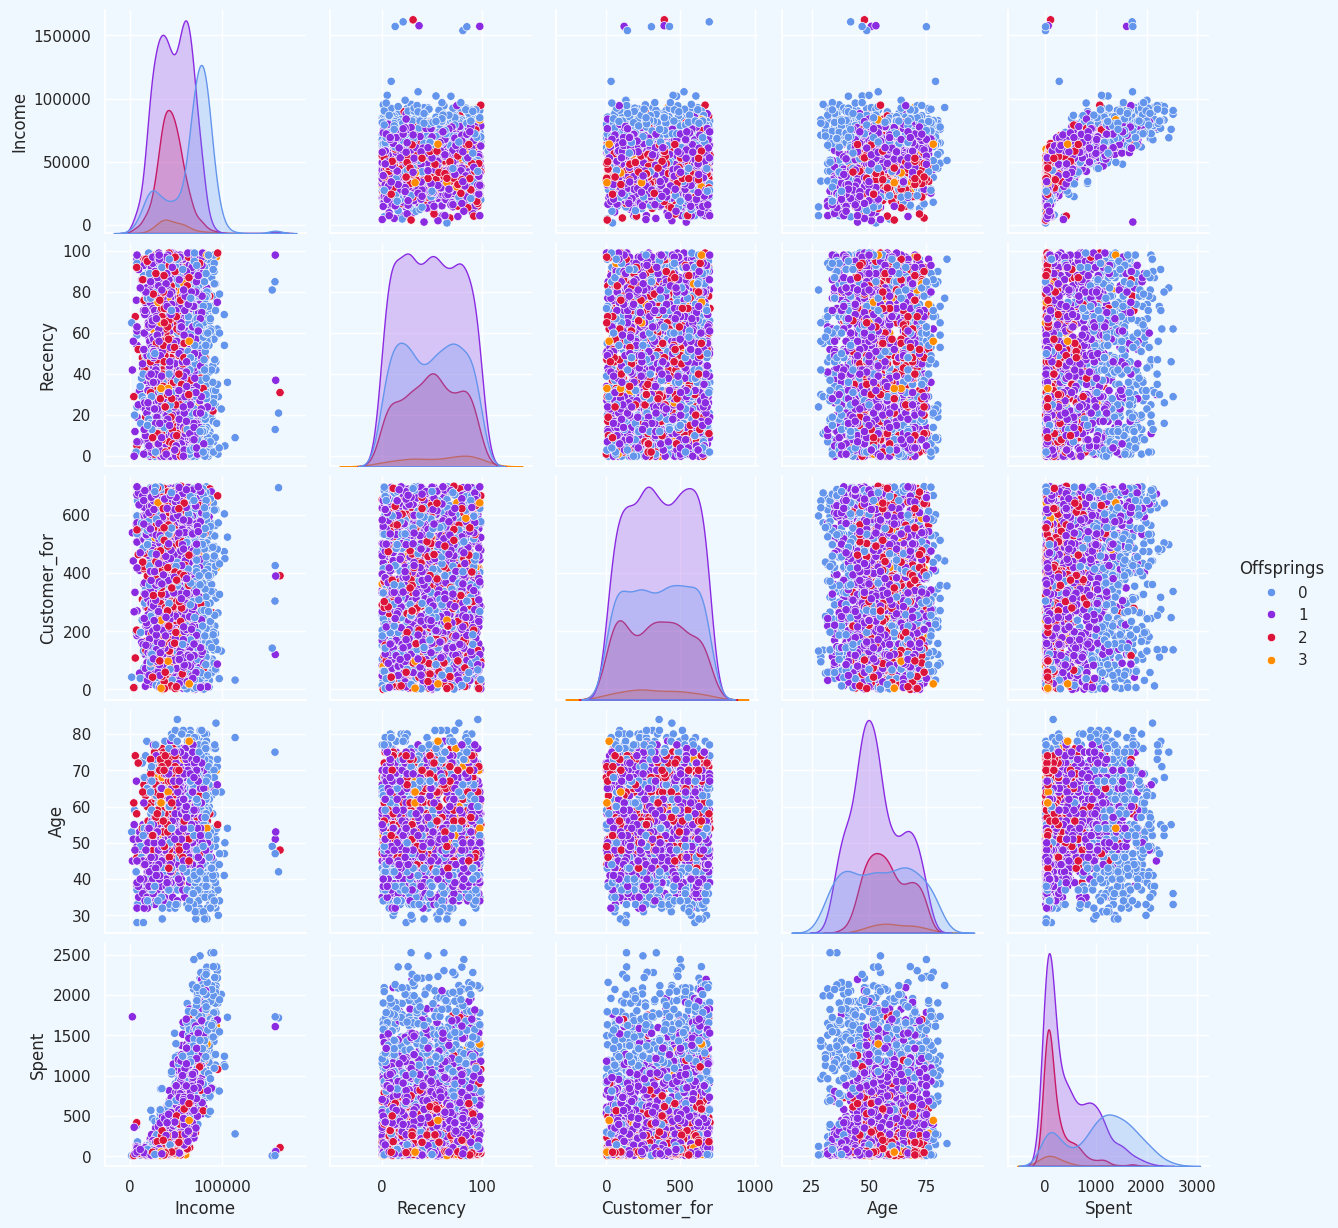

In [40]:
sns.set(rc={"axes.facecolor":"#F0F8FF","figure.facecolor":"#F0F8FF"})
pallet = ["#6495ED", "#8A2BE2", "#DC143C", "#FF8C00", "#006400", "#FFD700"]
cmap = colors.ListedColormap(["#6495ED", "#8A2BE2", "#DC143C", "#FF8C00", "#006400", "#FFD700"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Offsprings"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Offsprings",palette= (["#6495ED","#8A2BE2","#DC143C","#FF8C00"]))
#Taking hue
plt.show()

<Axes: >

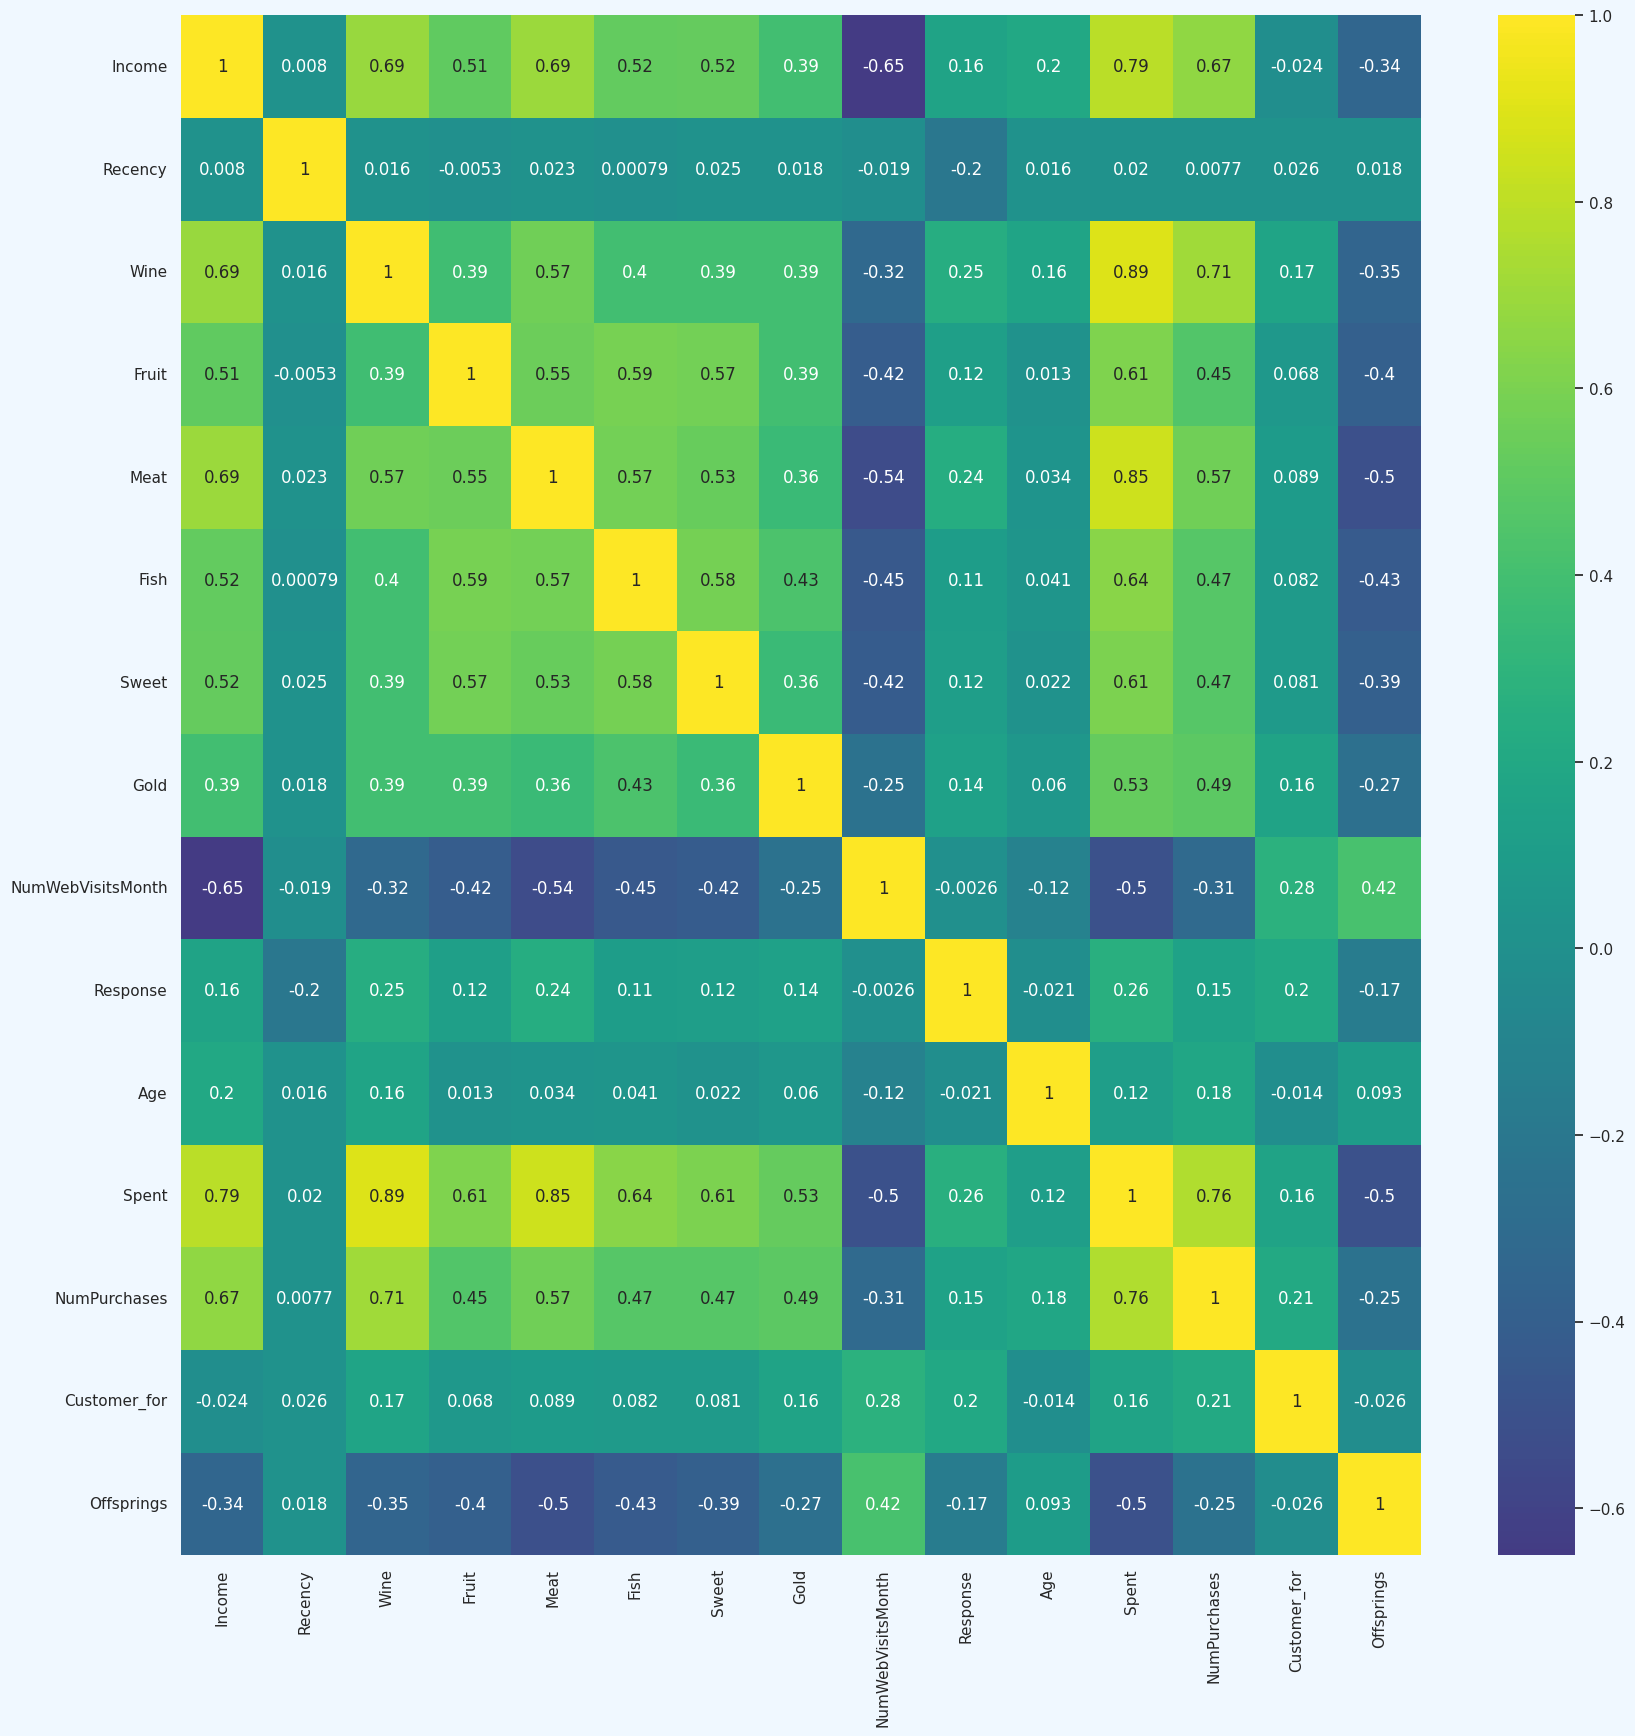

In [41]:
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap='viridis', center=0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   object 
 1   Marital_Status     2212 non-null   object 
 2   Income             2212 non-null   float64
 3   Recency            2212 non-null   int64  
 4   Wine               2212 non-null   int64  
 5   Fruit              2212 non-null   int64  
 6   Meat               2212 non-null   int64  
 7   Fish               2212 non-null   int64  
 8   Sweet              2212 non-null   int64  
 9   Gold               2212 non-null   int64  
 10  NumWebVisitsMonth  2212 non-null   int64  
 11  Response           2212 non-null   int64  
 12  Age                2212 non-null   int64  
 13  Spent              2212 non-null   int64  
 14  NumPurchases       2212 non-null   int64  
 15  Customer_for       2212 non-null   int64  
 16  Offsprings         2212 

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [44]:
df.head()

Education  Marital_Status   Income  Recency  Wine  Fruit  Meat  Fish  \
0          0               1  58138.0       58   635     88   546   172   
1          0               1  46344.0       38    11      1     6     2   
2          0               0  71613.0       26   426     49   127   111   
3          0               0  26646.0       26    11      4    20    10   
4          0               0  58293.0       94   173     43   118    46   

   Sweet  Gold  NumWebVisitsMonth  Response  Age  Spent  NumPurchases  \
0     88    88                  7         1   67   1617            25   
1      1     6                  5         0   70     27             6   
2     21    42                  4         0   59    776            21   
3      3     5                  6         0   40     53             8   
4     27    15                  5         0   43    422            19   

   Customer_for  Offsprings  
0           663           0  
1           113           2  
2           312           0  
3           139           1  
4           161           1

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
# Store the original column names before overwriting 'data'
original_columns = df.columns
df = pd.DataFrame(data_scaled, columns=original_columns)

In [46]:
df.head()

Education  Marital_Status    Income   Recency      Wine     Fruit  \
0        0.0             1.0  0.351086  0.585859  0.425318  0.442211   
1        0.0             1.0  0.277680  0.383838  0.007368  0.005025   
2        0.0             0.0  0.434956  0.262626  0.285332  0.246231   
3        0.0             0.0  0.155079  0.262626  0.007368  0.020101   
4        0.0             0.0  0.352051  0.949495  0.115874  0.216080   

       Meat      Fish     Sweet      Gold  NumWebVisitsMonth  Response  \
0  0.316522  0.664093  0.335878  0.274143               0.35       1.0   
1  0.003478  0.007722  0.003817  0.018692               0.25       0.0   
2  0.073623  0.428571  0.080153  0.130841               0.20       0.0   
3  0.011594  0.038610  0.011450  0.015576               0.30       0.0   
4  0.068406  0.177606  0.103053  0.046729               0.25       0.0   

        Age     Spent  NumPurchases  Customer_for  Offsprings  
0  0.696429  0.639683      0.568182      0.948498    0.000000  
1  0.750000  0.008730      0.136364      0.161660    0.666667  
2  0.553571  0.305952      0.477273      0.446352    0.000000  
3  0.214286  0.019048      0.181818      0.198856    0.333333  
4  0.267857  0.165476      0.431818      0.230329    0.333333

##K-Means Clustering

In [47]:
!pip install yellowbrick

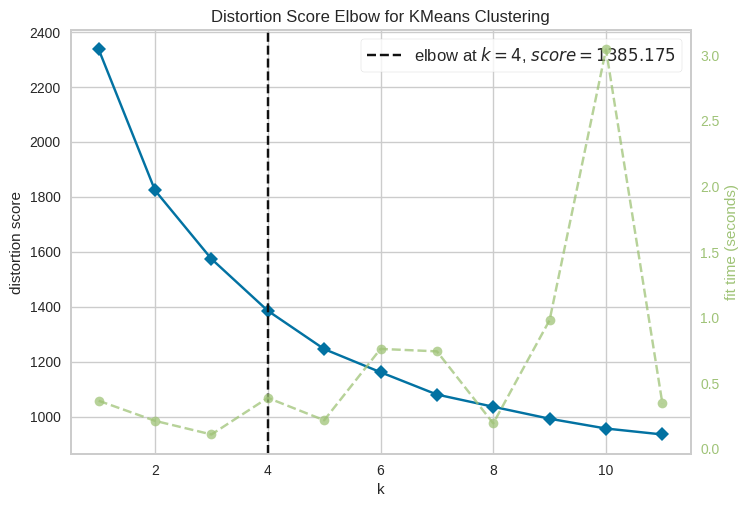

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df)
visualizer.show()

In [49]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
labels = kmeans.labels_
df['Cluster'] = labels

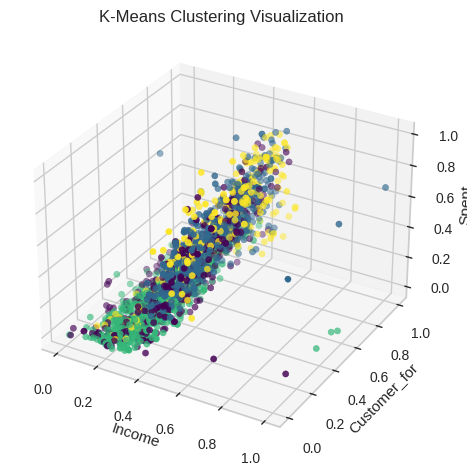

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame with cluster labels and you want to plot features 'Income', 'Recency', and 'Spent'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors representing clusters
ax.scatter(df['Income'], df['Customer_for'], df['Spent'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Income')
ax.set_ylabel('Customer_for')
ax.set_zlabel('Spent')
plt.title('K-Means Clustering Visualization')
plt.show()

In [51]:
import plotly.express as px

# Assuming 'df' is your DataFrame with cluster labels and you want to plot features 'Income', 'Recency', and 'Spent'
fig = px.scatter_3d(df, x='Income', y='Customer_for', z='Spent', color='Cluster')
fig.show()

In [52]:
data.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  Postgraduate         Single  58138.0        0         0  2012-09-04   
1  Postgraduate         Single  46344.0        1         1  2014-03-08   
2  Postgraduate        Married  71613.0        0         0  2013-08-21   
3  Postgraduate        Married  26646.0        1         0  2014-02-10   
4  Postgraduate        Married  58293.0        1         0  2014-01-19   

   Recency  Wine  Fruit  Meat  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0       58   635     88   546  ...             0             0             0   
1       38    11      1     6  ...             0             0             0   
2       26   426     49   127  ...             0             0             0   
3       26    11      4    20  ...             0             0             0   
4       94   173     43   118  ...             0             0             0   

   AcceptedCmp2  Response  Age  Spent  NumPurchases  isParent  Customer_for  
0             0         1   67   1617            25         0           663  
1             0         0   70     27             6         1           113  
2             0         0   59    776            21         0           312  
3             0         0   40     53             8         1           139  
4             0         0   43    422            19         1           161  

[5 rows x 25 columns]

In [53]:
data['Marital_Status']=le.fit_transform(data['Marital_Status'])
data['Education']=le.fit_transform(data['Education'])

In [54]:
data['Customer_for']=data['Dt_Customer'].max()-data['Dt_Customer']
data['Customer_for']=data['Customer_for'].dt.days

In [55]:
data.drop('Dt_Customer',axis=1,inplace=True)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean           std           min           25%  \
col1  2212.0 -2.078845e-12  21534.440569 -50229.931261 -16733.144782   
col2  2212.0 -9.724028e-14    437.524049  -2422.104588   -234.544669   
col3  2212.0 -2.179169e-14    191.958259   -537.413859   -153.919761   

             50%           75%            max  
col1 -591.045217  16546.026817  110386.732501  
col2   39.970424    268.846363    3347.670930  
col3    5.072649    151.529016     672.915421

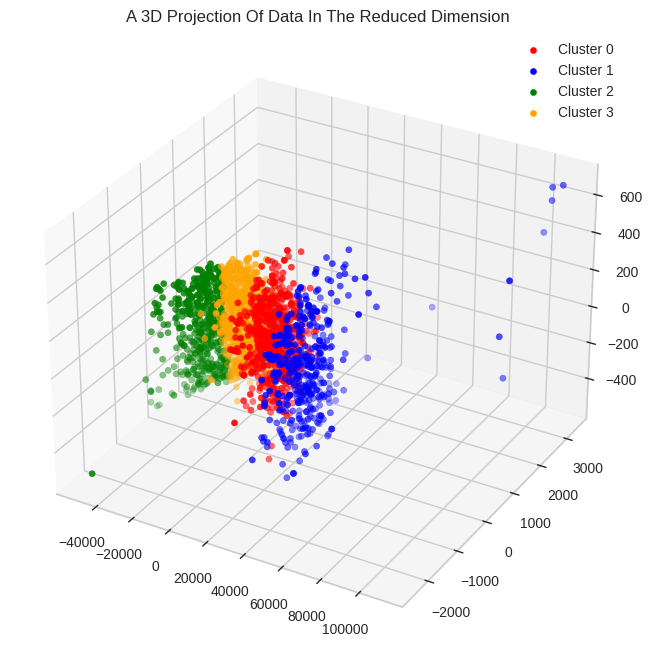

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# Perform clustering (example using KMeans)
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(PCA_ds)

# Define a color map for the clusters
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  # Adjust colors as needed

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with different colors for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_data = PCA_ds[clusters == cluster]
    ax.scatter(cluster_data["col1"], cluster_data["col2"], cluster_data["col3"],
               c=color_map[cluster], marker="o", label=f'Cluster {cluster}')

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.legend()  # Add a legend to identify clusters
plt.show()

##DBSCAN

In [61]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [62]:
PCA_ds.head()

col1        col2        col3  cluster
0   6206.100028 -987.039186  101.740287        3
1  -5630.232728  560.807769 -144.977191        0
2  19652.529051  312.639366   36.393025        3
3 -25320.995548   32.871764 -222.240411        2
4   6326.233370  420.582119 -122.104651        3

In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(PCA_ds)

In [64]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit(scaled_data)

In [67]:
PCA_ds['Cluster_DBSCAN'] = clusters.labels_

In [68]:
PCA_ds.head()

col1        col2        col3  cluster  Cluster_DBSCAN
0   6206.100028 -987.039186  101.740287        3               0
1  -5630.232728  560.807769 -144.977191        0               1
2  19652.529051  312.639366   36.393025        3               0
3 -25320.995548   32.871764 -222.240411        2               2
4   6326.233370  420.582119 -122.104651        3               0

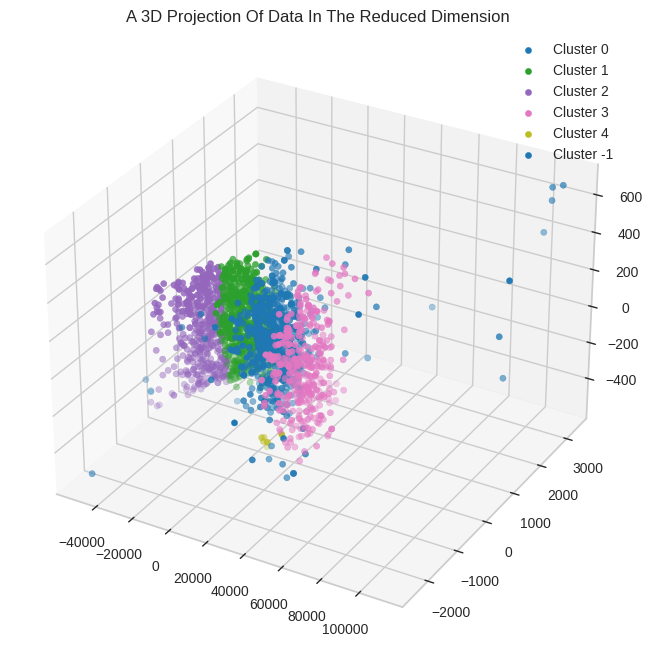

In [88]:
color_map={i:plt.cm.tab10(i) for i in range(len(set(clusters.labels_)))} # Dynamically create colors

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
cmap=plt.cm.get_cmap('tab10', 6)
for cluster in set(clusters.labels_):
    cluster_data = PCA_ds[PCA_ds['Cluster_DBSCAN'] == cluster]
    ax.scatter(cluster_data["col1"], cluster_data["col2"], cluster_data["col3"],
                c=cmap(cluster),marker="o", label=f'Cluster {cluster}')

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.legend()  # Add a legend to identify clusters
plt.show()

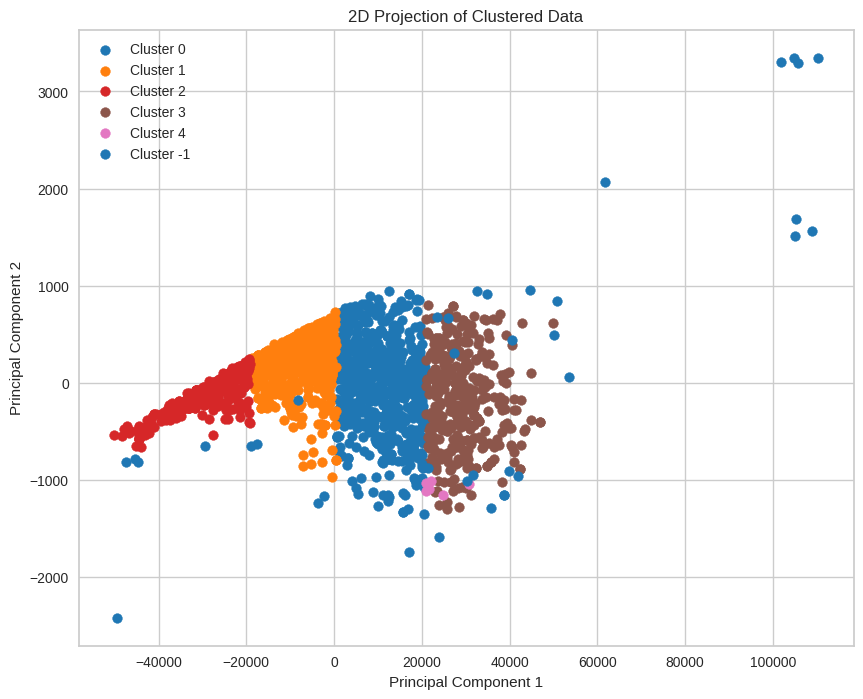

In [90]:
import matplotlib.pyplot as plt

# Assuming 'PCA_ds' is your DataFrame with 'Cluster_DBSCAN' column and 'col1', 'col2' for 2D plotting
fig, ax = plt.subplots(figsize=(10, 8))
cmap=plt.cm.get_cmap('tab10', 7)
# Get unique cluster labels
unique_clusters = set(PCA_ds['Cluster_DBSCAN'])

# Colormap for clusters
color_map = {i: plt.cm.tab10(i) for i in range(len(unique_clusters))}

# Plot each cluster
for cluster in unique_clusters:
    cluster_data = PCA_ds[PCA_ds['Cluster_DBSCAN'] == cluster]
    ax.scatter(cluster_data["col1"], cluster_data["col2"],
               c=cmap(cluster), marker="o", label=f'Cluster {cluster}')

# Set title and labels
ax.set_title("2D Projection of Clustered Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.legend()
plt.show()